# Domain - Telecommunication
## Problem Statement:
## Predict if a customer is going to churn or not in the coming future based on the customers behavior for a big Telcom Companies

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

# get the output for all commands

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

C:\Users\psath\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Major steps invloved in EDA
1. Check for Duplicates
2. Handle missing values
3. Handle outliers
4. Descriptive Statistics
5. Data Visualization
6. Feature Scaling: Standardization & Normalization

In [2]:
telecom_df = pd.read_csv(r"C:\Users\psath\Downloads\Machine Learning(Telecomm)\churn_dataset.csv",skipinitialspace = True)

In [3]:
telecom_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [4]:
telecom_df.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
telecom_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Checking for Duplicates

In [6]:
telecom_df.duplicated()
telecom_df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

False    7043
dtype: int64

**There are no duplicates in the Dataset**

## Identifying Null Values

In [7]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**There are 11 null values in TotalCharges column in the dataset**

In [8]:
telecom_df[telecom_df.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
telecom_df.TotalCharges.mean()
telecom_df.TotalCharges.median()

2283.3004408418656

1397.475

In [10]:
telecom_df.TotalCharges = telecom_df.TotalCharges.fillna(telecom_df.TotalCharges.mean())

In [11]:
telecom_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Now there are no null values after replacing with mean in TotalCharges Column**

## Identify Corrupted Data

In [12]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**No corrupted data so no need of converting convert corrupted data into missing values**

## Identify the Outliers

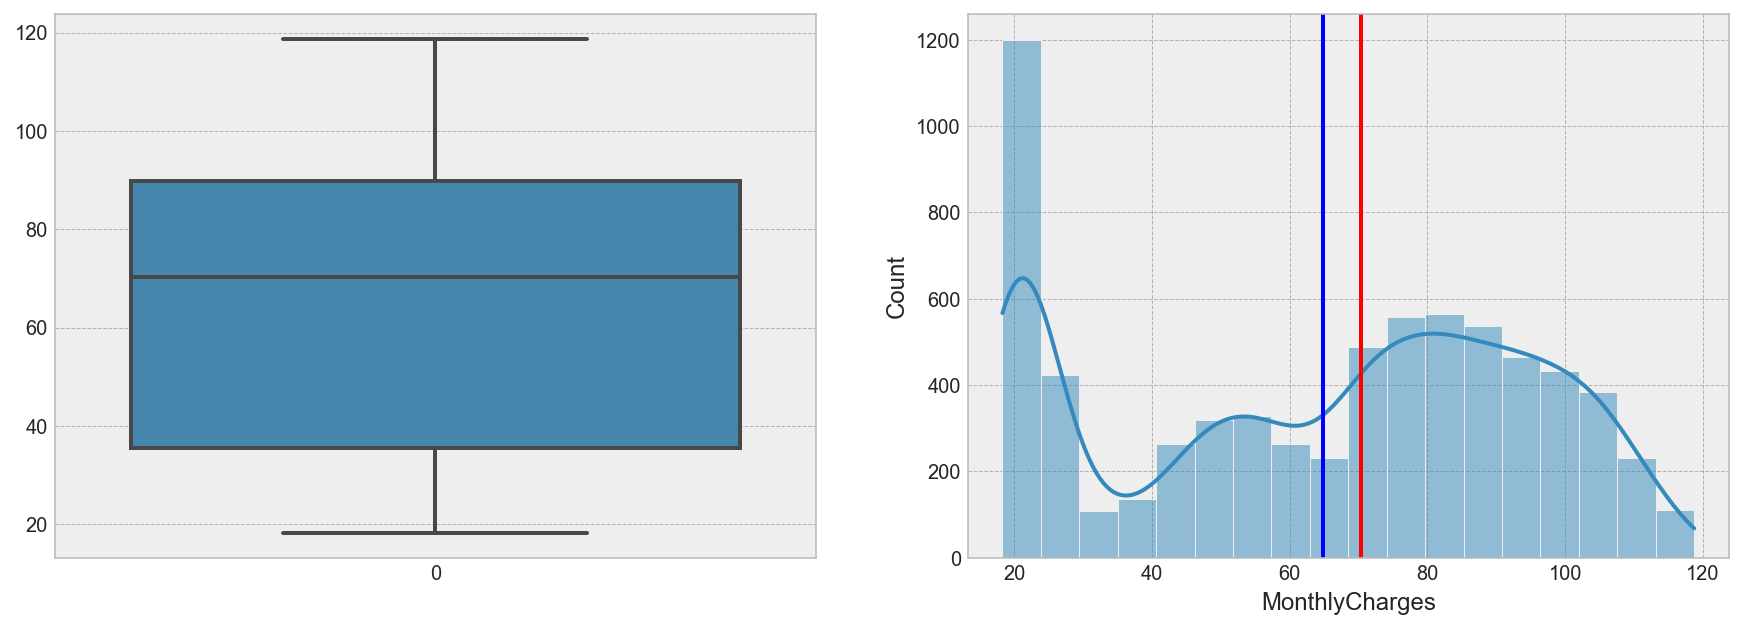

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(telecom_df.MonthlyCharges)

plt.subplot(122)
sns.histplot(telecom_df.MonthlyCharges, kde = True)
plt.axvline(telecom_df.MonthlyCharges.mean(), color = 'blue')
plt.axvline(telecom_df.MonthlyCharges.median(), color = 'red');

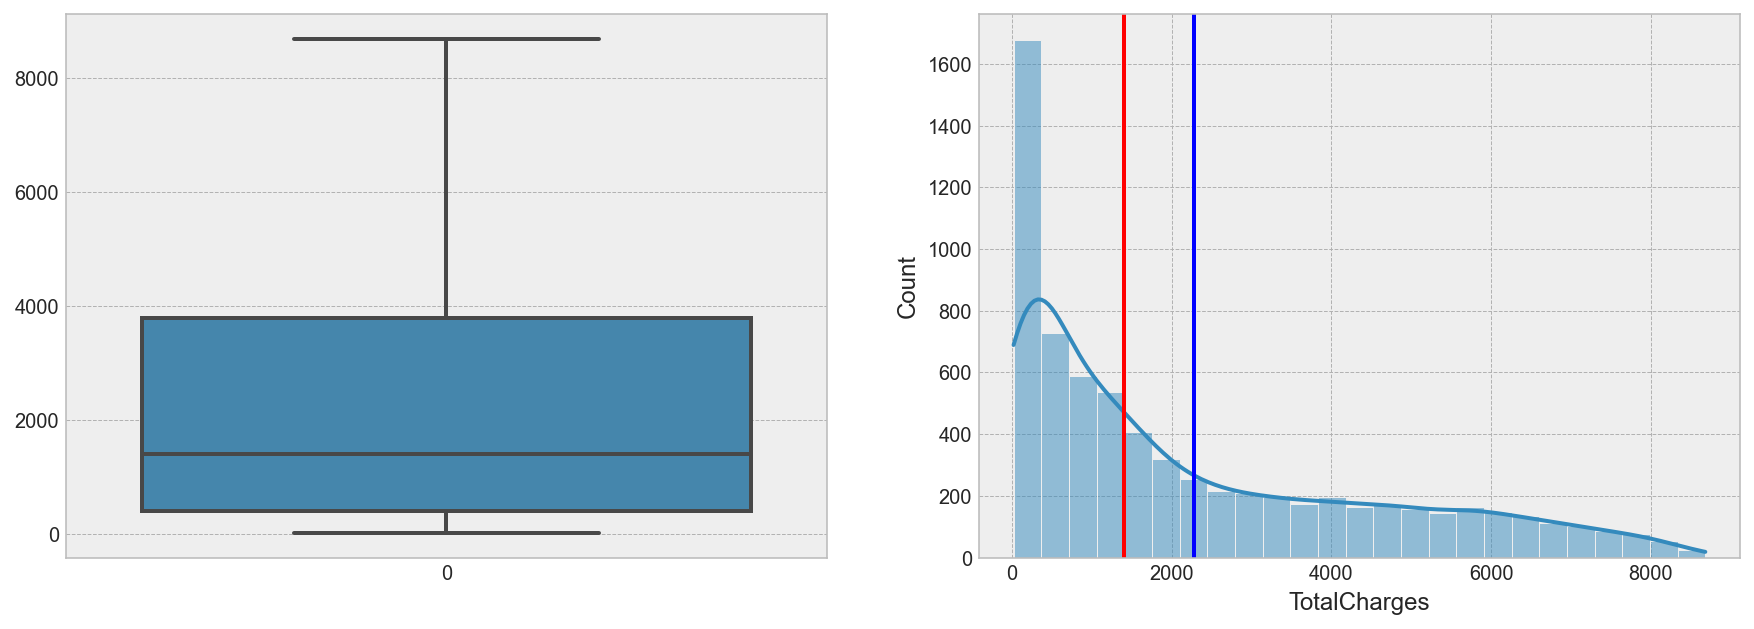

In [14]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(telecom_df.TotalCharges)

plt.subplot(122)
sns.histplot(telecom_df.TotalCharges, kde = True)
plt.axvline(telecom_df.TotalCharges.mean(), color = 'blue')
plt.axvline(telecom_df.TotalCharges.median(), color = 'red');

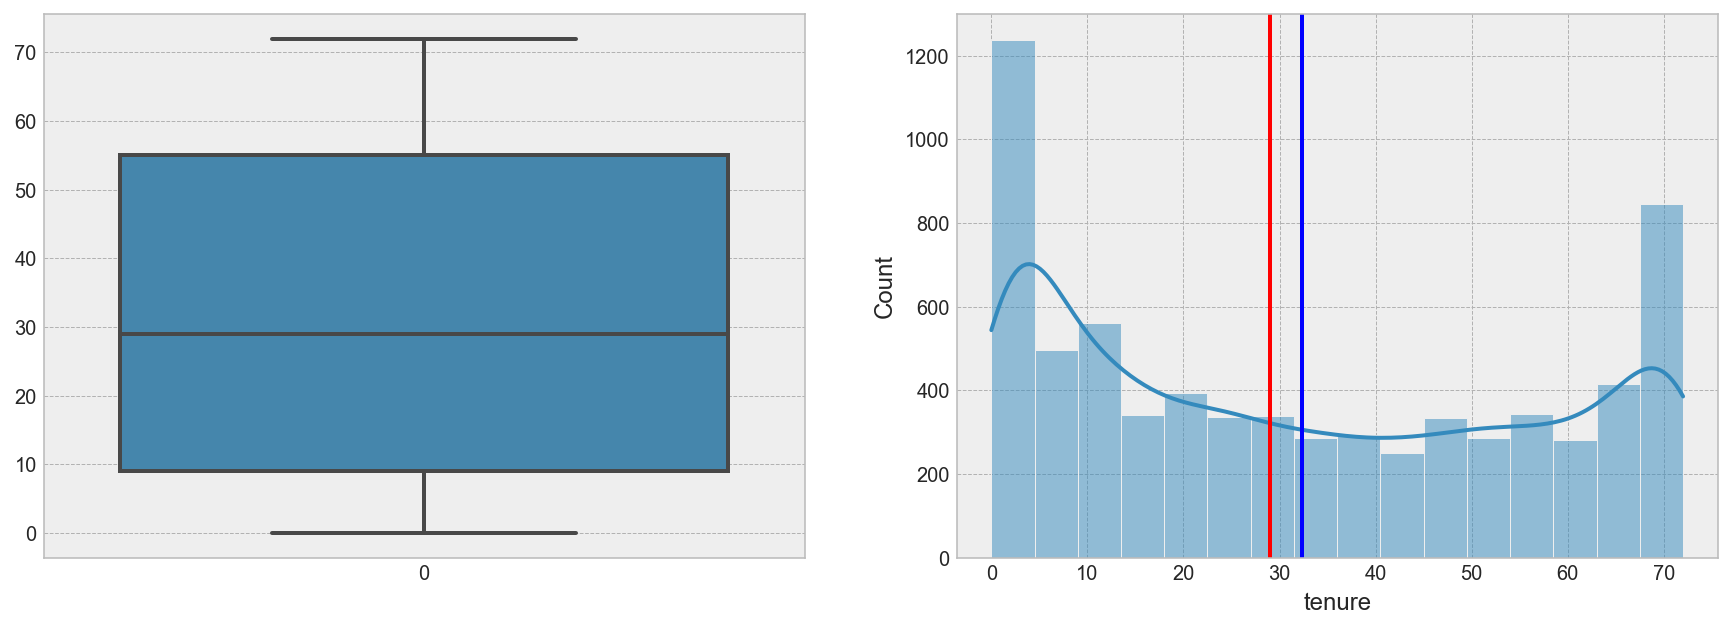

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(telecom_df.tenure)

plt.subplot(122)
sns.histplot(telecom_df.tenure, kde = True)
plt.axvline(telecom_df.tenure.mean(), color = 'blue')
plt.axvline(telecom_df.tenure.median(), color = 'red');

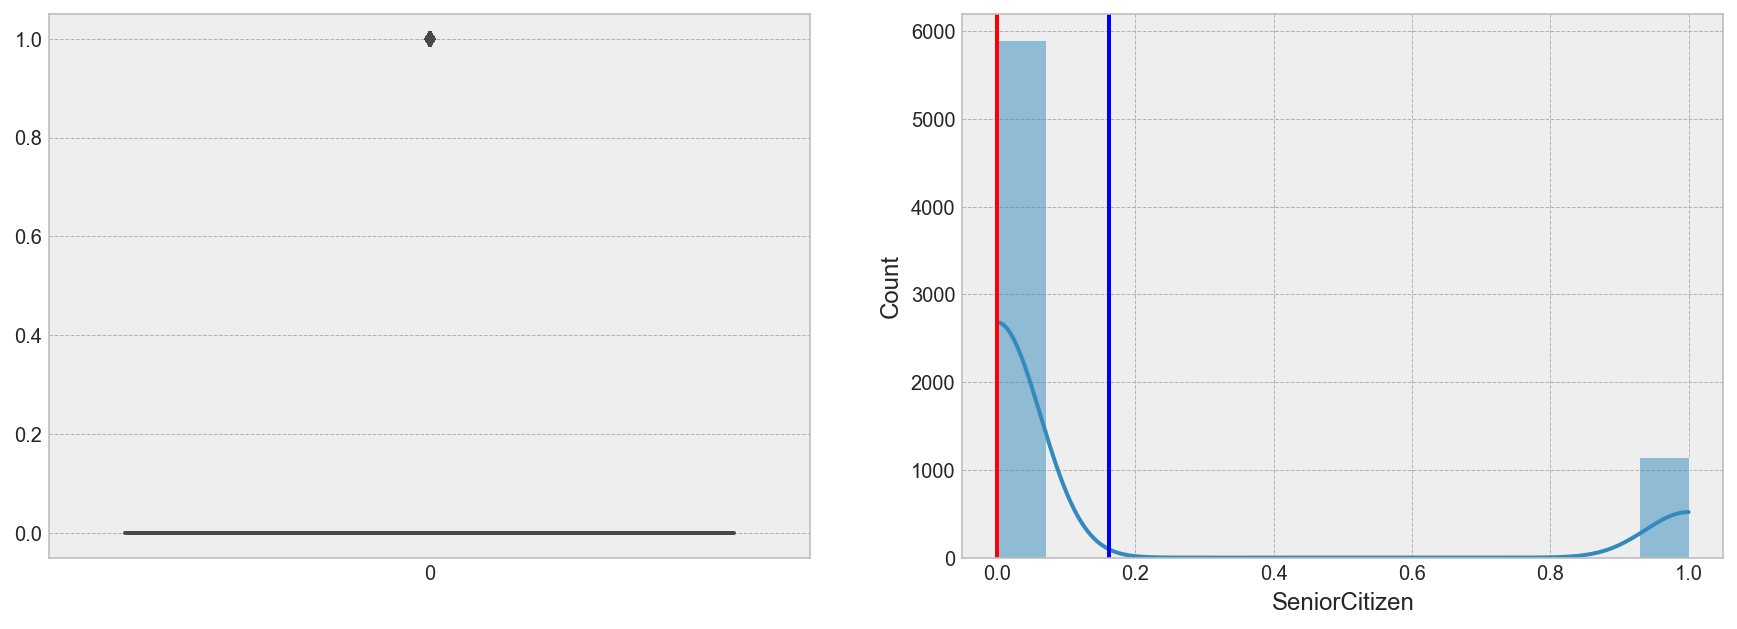

In [16]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(telecom_df.SeniorCitizen)

plt.subplot(122)
sns.histplot(telecom_df.SeniorCitizen, kde = True)
plt.axvline(telecom_df.SeniorCitizen.mean(), color = 'blue')
plt.axvline(telecom_df.SeniorCitizen.median(), color = 'red');

**No need of deal with with outliers as it has no much impact**

## Analysis

In [17]:
telecom_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
telecom_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Data Visualization

In [19]:
telecom_df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


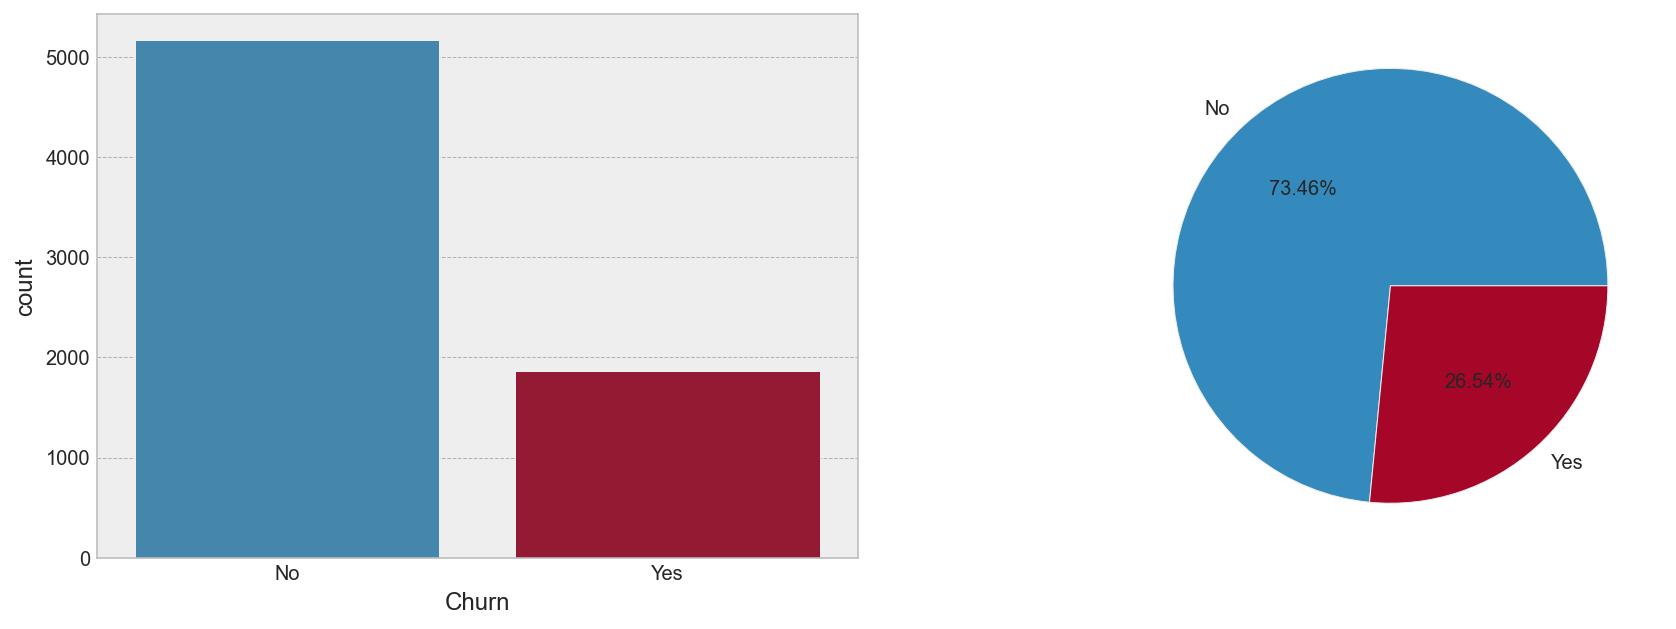

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=telecom_df.Churn)
plt.subplot(122)
plt.pie(telecom_df.Churn.value_counts().values,labels=telecom_df.Churn.value_counts().index,autopct='%.2f%%');

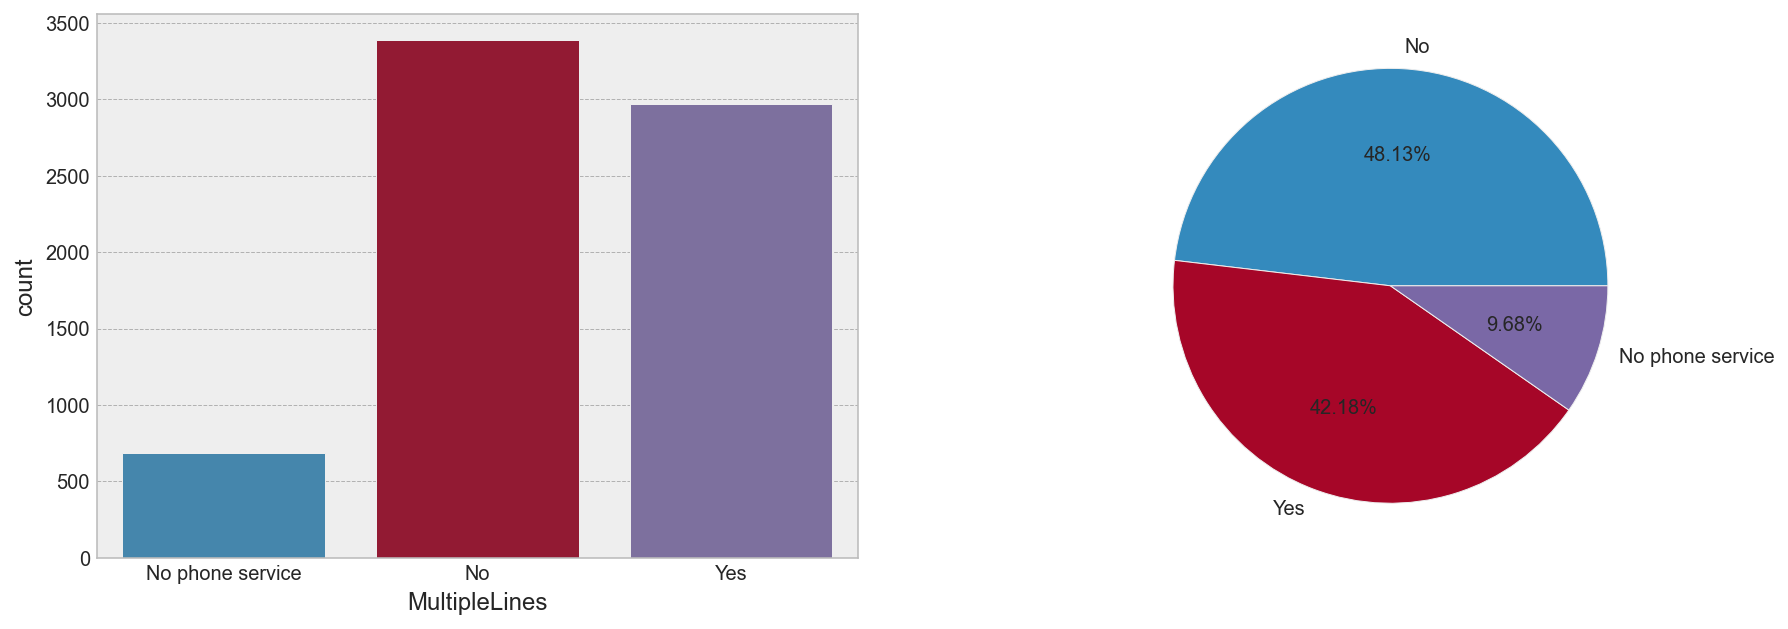

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(x=telecom_df.MultipleLines)
plt.subplot(122)
plt.pie(telecom_df.MultipleLines.value_counts().values,labels=telecom_df.MultipleLines.value_counts().index,autopct='%.2f%%');

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

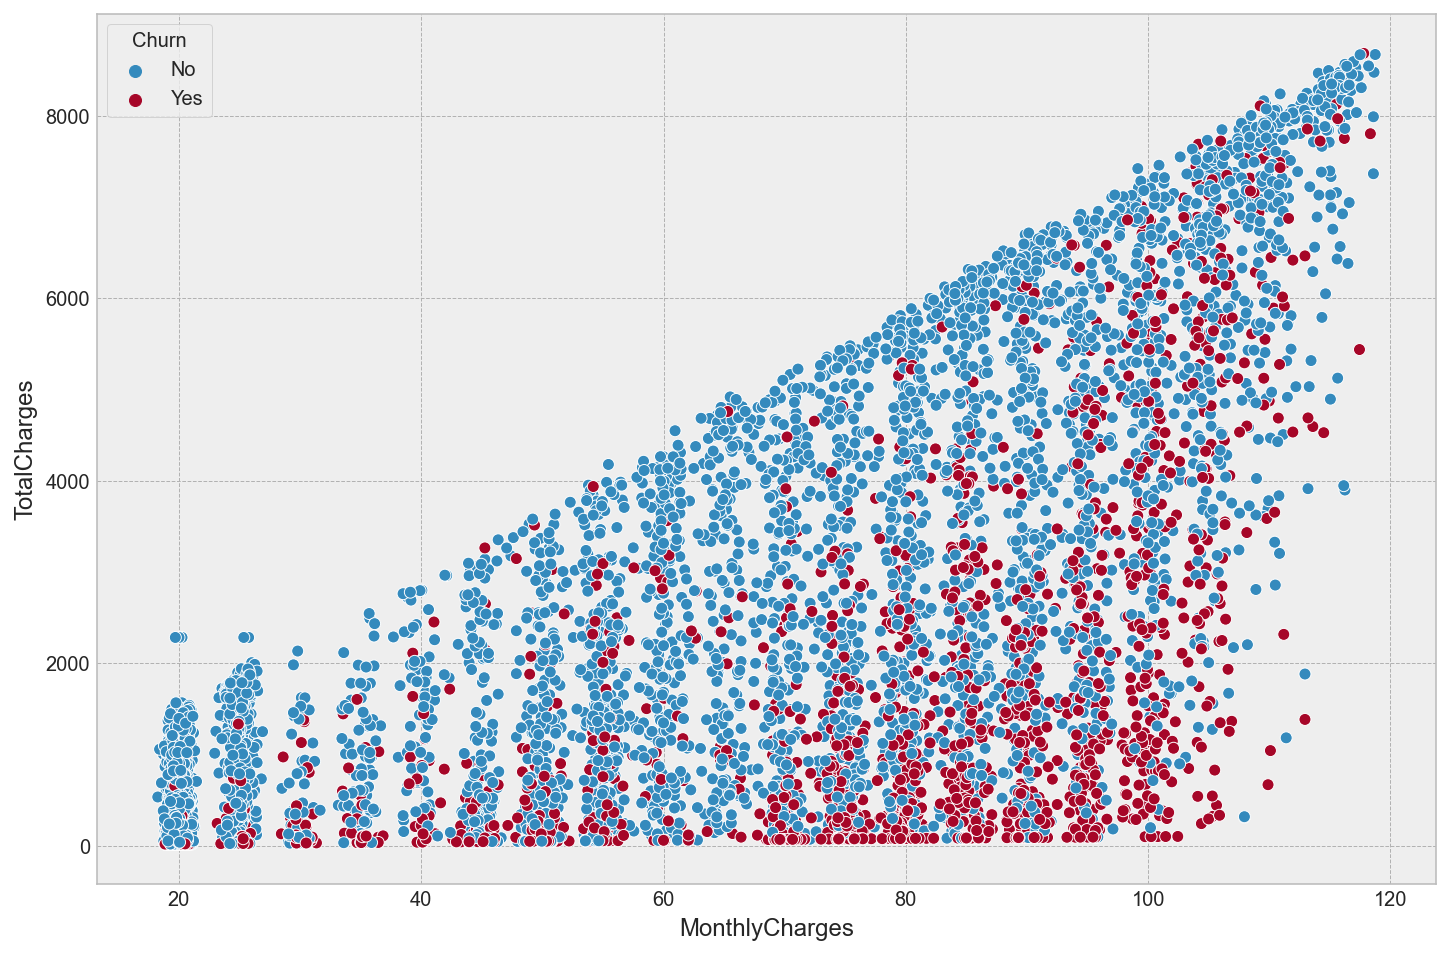

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=telecom_df.MonthlyCharges,y=telecom_df.TotalCharges,hue=telecom_df.Churn)

<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='Contract', ylabel='count'>

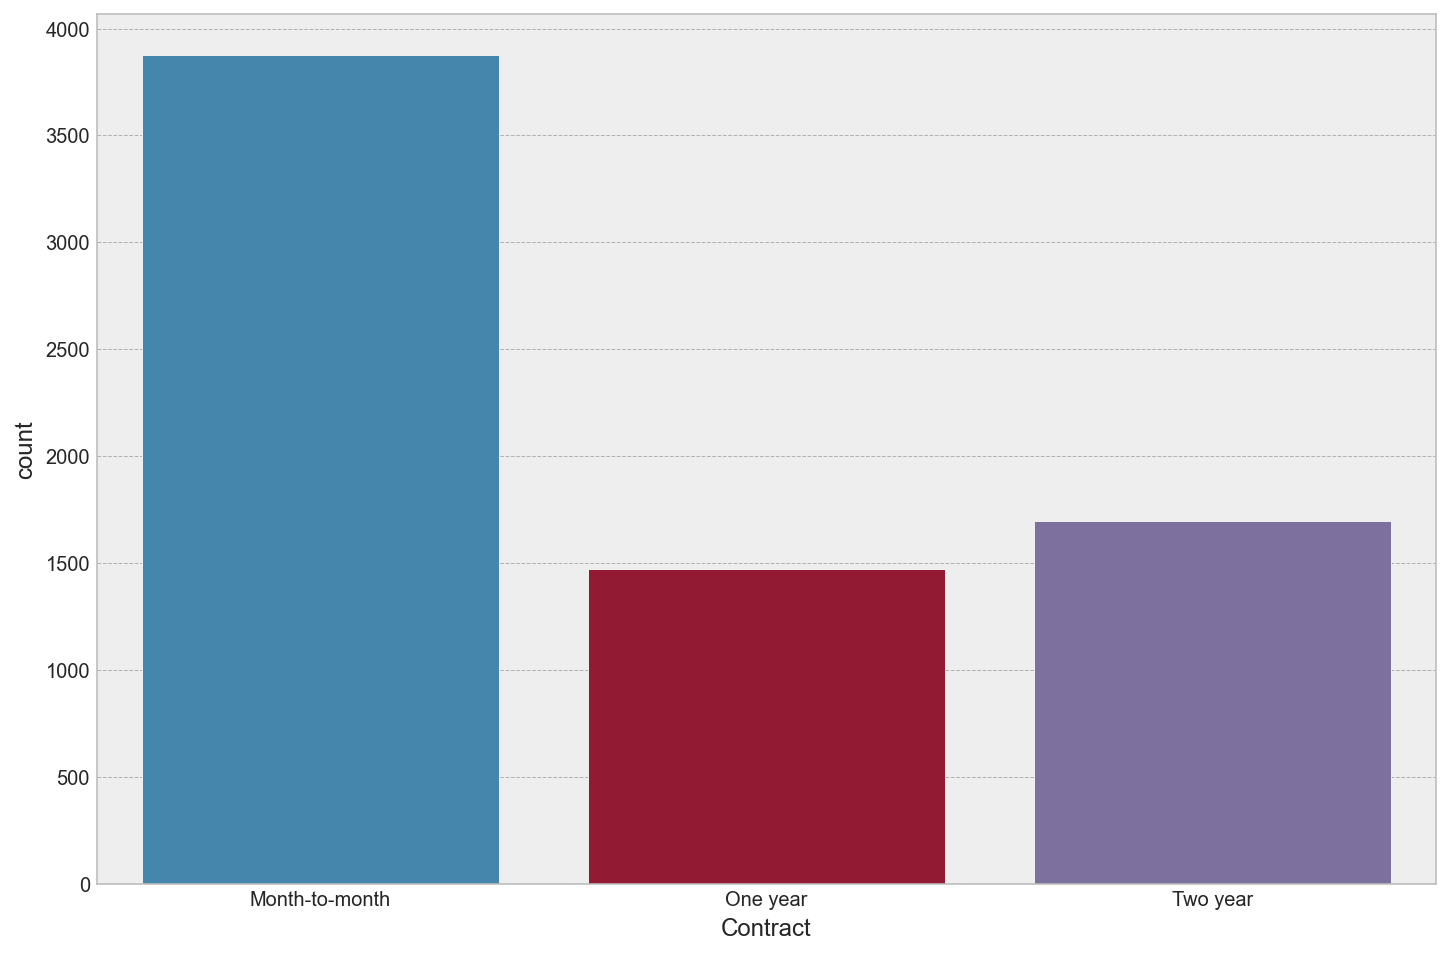

In [23]:
plt.figure(figsize=(12,8))
sns.countplot(x=telecom_df.Contract)

<Figure size 864x576 with 0 Axes>

<AxesSubplot:>

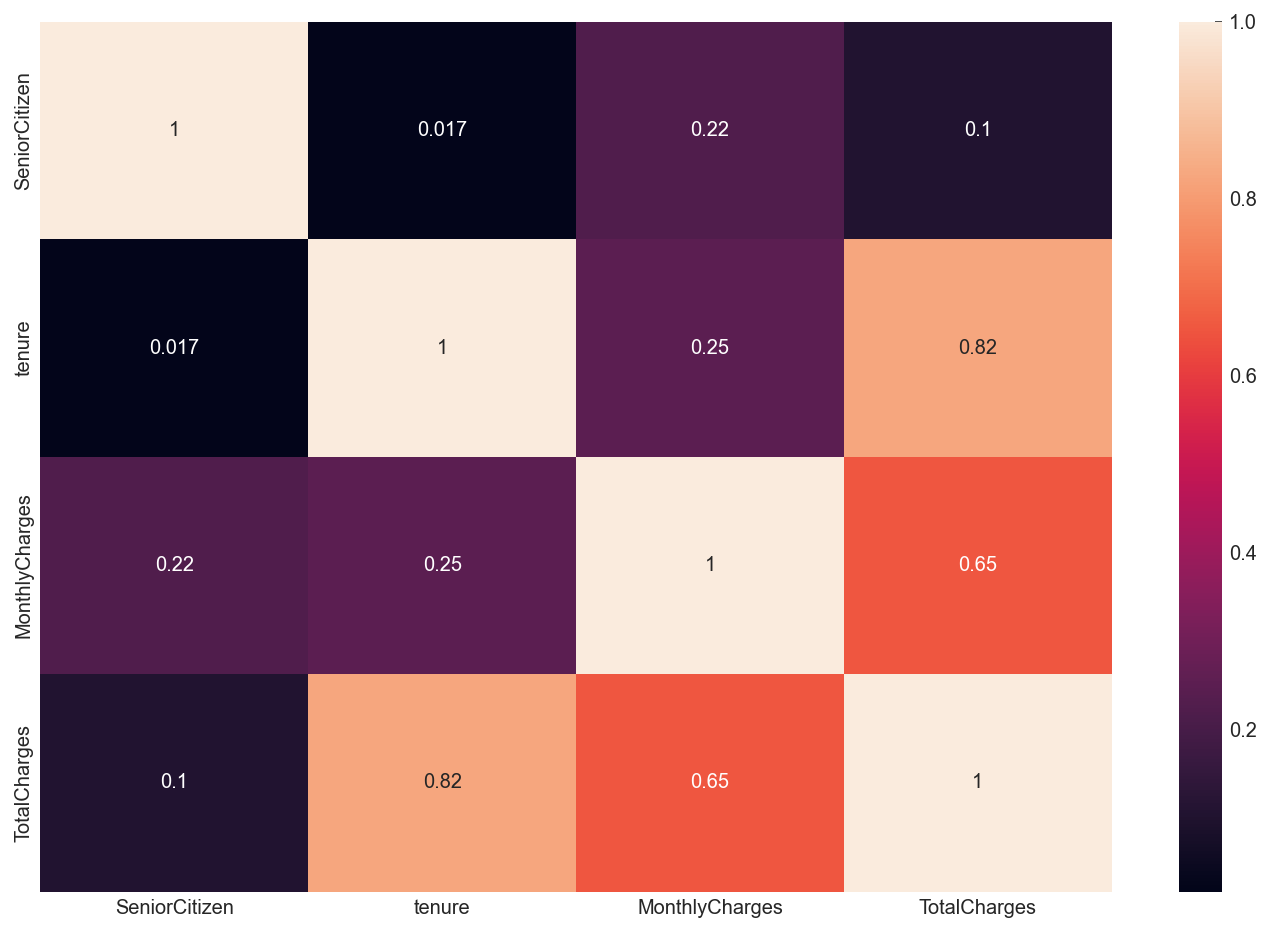

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(telecom_df.corr(),annot=True)

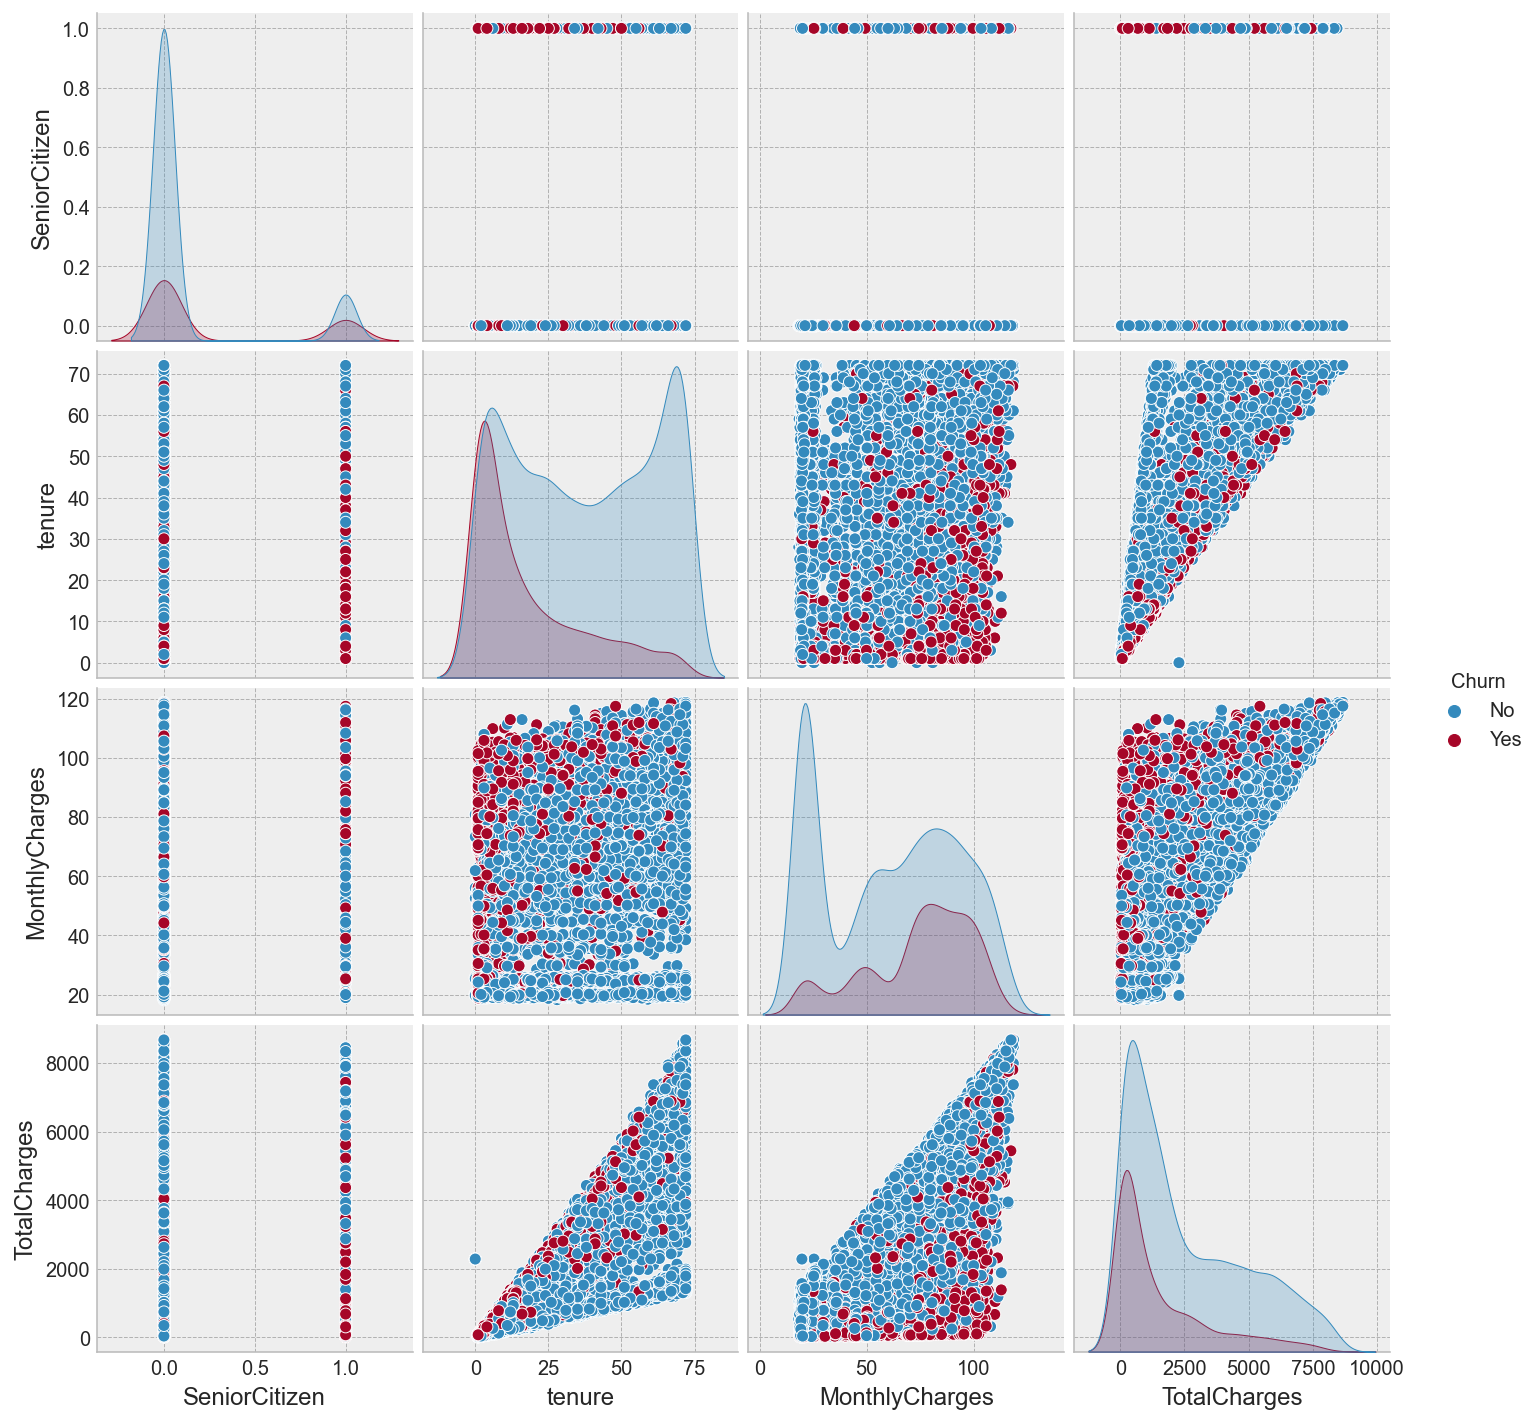

In [25]:
sns.pairplot(telecom_df, hue='Churn')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

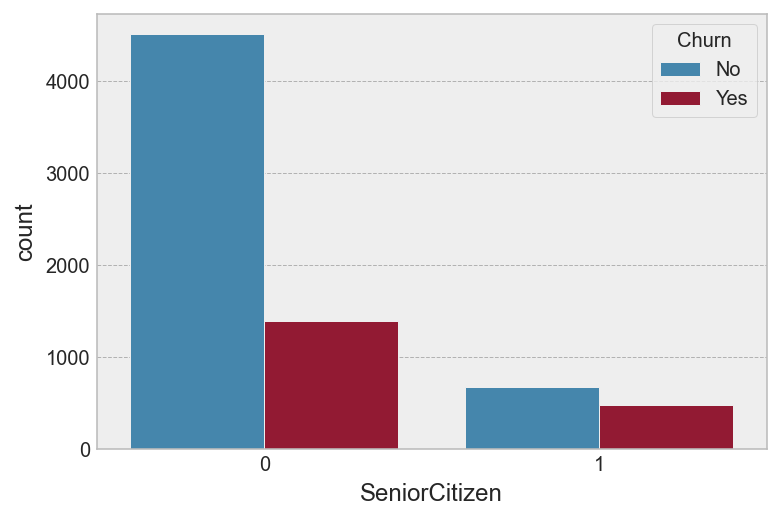

In [26]:
sns.countplot(x=telecom_df.SeniorCitizen, hue= telecom_df.Churn)

In [81]:
telecom_df[['SeniorCitizen','Churn']].groupby('Churn').count()

,SeniorCitizen
Churn,
No,5174
Yes,1869


## Conclusion:
* Senior Citizen
* Churn 
* No         5124
* Yes        1864
* By seeing the above graph we  should suggest the clients that they should target non-senior citegen to enhance the not churn

In [27]:
telecom_df.to_csv(r"C:\Users\psath\Downloads\Machine Learning(Telecomm)\churn_cleaned.csv", index = False)

In [28]:
telecom_df1 = pd.read_csv(r"C:\Users\psath\Downloads\Machine Learning(Telecomm)\churn_cleaned.csv")

In [29]:
telecom_df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Machine Learning Problem
* Build a system which can take features of Churn Prediction like customerID, gender, ..... etc.. and predicts the Churn of Telecommunication.\
Target Variable: Churn

## Identfing the Input and the Output Variables

In [30]:
y = telecom_df1['Churn']
x = telecom_df1.iloc[:,1:20]

In [31]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [32]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

## Sepearting the Data into Train and Test

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


In [34]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3296,Female,0,No,No,24,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),49.30,1233.25
6397,Male,1,No,No,54,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),65.25,3529.95
6043,Male,0,No,No,3,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,40.15,130.75
5309,Female,0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.80
3000,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,Male,0,Yes,No,15,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,103.45,1539.80
3264,Female,0,No,Yes,10,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Electronic check,91.10,964.35
1653,Male,0,Yes,No,58,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.75,1185.95
2607,Male,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.75,69.75


In [35]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2200,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25
4627,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50
3225,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85
2828,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45
3768,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,Female,0,Yes,No,71,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),83.30,5894.50
2551,Female,0,No,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.45,227.45
5735,Female,0,Yes,Yes,48,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,935.90
5096,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.85,6263.80


In [36]:
print(x_train.shape, y_train.shape)

print(x_test.shape, y_test.shape)

(5282, 19) (5282,)
(1761, 19) (1761,)


## Separating Categorical and Numerical Columns

In [37]:
x_train.head(25)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3296,Female,0,No,No,24,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,Yes,Credit card (automatic),49.30,1233.25
6397,Male,1,No,No,54,Yes,No,DSL,No,No,Yes,Yes,No,Yes,One year,No,Bank transfer (automatic),65.25,3529.95
6043,Male,0,No,No,3,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,40.15,130.75
5309,Female,0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.80
3000,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
3101,Female,0,No,No,58,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.80,4526.85
2868,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,85.75,2146.50
4322,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.15,123.80
282,Female,0,No,Yes,1,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,25.40,25.40
2111,Male,0,Yes,Yes,30,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,21.25,711.90


In [38]:
x_train.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [39]:
x_train_cat_ord = x_train[['Contract']]
x_train_cat_ohe = x_train[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']]

In [40]:
x_train_cat_ohe

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
3296,Female,No,No,Yes,No,DSL,No,No,Yes,No,No,No,Yes,Credit card (automatic)
6397,Male,No,No,Yes,No,DSL,No,No,Yes,Yes,No,Yes,No,Bank transfer (automatic)
6043,Male,No,No,No,No phone service,DSL,No,No,Yes,No,Yes,No,Yes,Mailed check
5309,Female,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Credit card (automatic)
3000,Male,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,Male,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,Electronic check
3264,Female,No,Yes,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,No,Yes,Electronic check
1653,Male,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check
2607,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check


In [41]:
x_train_cat_ord

,Contract
3296,Month-to-month
6397,One year
6043,Month-to-month
5309,Two year
3000,Month-to-month
...,...
4931,Month-to-month
3264,Month-to-month
1653,Two year
2607,Month-to-month


In [42]:
x_train_num = x_train.select_dtypes(include=['int64', 'float64'])

x_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,0,24,49.30,1233.25
6397,1,54,65.25,3529.95
6043,0,3,40.15,130.75
5309,0,61,20.25,1278.80
3000,0,12,84.45,1059.55


## Scaling the Numerical Features

In [43]:
x_train_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,0,24,49.30,1233.25
6397,1,54,65.25,3529.95
6043,0,3,40.15,130.75
5309,0,61,20.25,1278.80
3000,0,12,84.45,1059.55


In [44]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_num_transformed = pd.DataFrame(scaler.fit_transform(x_train_num), 
                                    columns = x_train_num.columns, 
                                    index = x_train_num.index)

x_train_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3296,-0.435476,-0.340191,-0.514314,-0.462171
6397,2.296336,0.883210,0.017840,0.555404
6043,-0.435476,-1.196572,-0.819594,-0.950644
5309,-0.435476,1.168670,-1.483535,-0.441989
3000,-0.435476,-0.829552,0.658427,-0.539130


In [45]:
x_train_num_transformed.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5.282000e+03,5.282000e+03,5.282000e+03,5.282000e+03
mean,-1.345215e-18,-1.049268e-16,-3.457203e-16,-1.049268e-16
std,1.000095e+00,1.000095e+00,1.000095e+00,1.000095e+00
min,-4.354763e-01,-1.318912e+00,-1.550263e+00,-1.000222e+00
25%,-4.354763e-01,-9.518918e-01,-9.663949e-01,-8.258005e-01
50%,-4.354763e-01,-1.362912e-01,1.863278e-01,-3.874153e-01
75%,-4.354763e-01,9.239896e-01,8.369237e-01,6.617272e-01
max,2.296336e+00,1.617250e+00,1.799472e+00,2.839309e+00


In [46]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [1.59409315e-01 3.23421053e+01 6.47152878e+01 2.27638437e+03]
Std of each column: [3.66057352e-01 2.45218061e+01 2.99725187e+01 2.25703360e+03]


## Applying OneHotEncoding on Categorical Columns

In [47]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

x_train_cat_ohe_trans = pd.DataFrame(encoder.fit_transform(x_train_cat_ohe), 
                               columns=encoder.get_feature_names_out(x_train_cat_ohe.columns), 
                               index = x_train_cat_ohe.index)

x_train_cat_ohe_trans.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3296,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
6397,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6043,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5309,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [48]:
x_train_cat_le = pd.DataFrame(index=x_train_cat_ord.index)

x_train_cat_le.head()

""
3296
6397
6043
5309
3000


In [49]:
x_train_cat_ord.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [50]:
Contract_encoder = { 'Month-to-month' : 3,'One year' : 2, 'Two year' : 1}

x_train_cat_le['Contract'] = x_train_cat_ord['Contract'].apply(lambda x : Contract_encoder[x])

x_train_cat_le.head()

,Contract
3296,3
6397,2
6043,3
5309,1
3000,3


## Concatinating the Encoded Categorical Features and Transformed Numerical Features

In [51]:
x_train_transformed = pd.concat([x_train_num_transformed, x_train_cat_ohe_trans, x_train_cat_le], axis=1)

x_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
3296,-0.435476,-0.340191,-0.514314,-0.462171,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3
6397,2.296336,0.883210,0.017840,0.555404,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
6043,-0.435476,-1.196572,-0.819594,-0.950644,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,3
5309,-0.435476,1.168670,-1.483535,-0.441989,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3000,-0.435476,-0.829552,0.658427,-0.539130,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3


## Preparing Test Data

In [52]:
x_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2200,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25
4627,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50
3225,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85
2828,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45
3768,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.40


In [53]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 2200 to 450
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1761 non-null   object 
 1   SeniorCitizen     1761 non-null   int64  
 2   Partner           1761 non-null   object 
 3   Dependents        1761 non-null   object 
 4   tenure            1761 non-null   int64  
 5   PhoneService      1761 non-null   object 
 6   MultipleLines     1761 non-null   object 
 7   InternetService   1761 non-null   object 
 8   OnlineSecurity    1761 non-null   object 
 9   OnlineBackup      1761 non-null   object 
 10  DeviceProtection  1761 non-null   object 
 11  TechSupport       1761 non-null   object 
 12  StreamingTV       1761 non-null   object 
 13  StreamingMovies   1761 non-null   object 
 14  Contract          1761 non-null   object 
 15  PaperlessBilling  1761 non-null   object 
 16  PaymentMethod     1761 non-null   object

In [54]:
x_test_cat_ord = x_test[['Contract']]
x_test_cat_ohe = x_test[['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod']]

In [55]:
x_test_cat_ord

,Contract
2200,One year
4627,One year
3225,Month-to-month
2828,Two year
3768,Month-to-month
...,...
3184,Two year
2551,Month-to-month
5735,Two year
5096,Two year


In [56]:
x_test_cat_ohe

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
2200,Female,No,No,Yes,No,DSL,No,Yes,No,No,Yes,No,No,Electronic check
4627,Male,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic)
3225,Female,No,No,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Yes,Electronic check
2828,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check
3768,Female,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Yes,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,Female,Yes,No,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Yes,Credit card (automatic)
2551,Female,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Bank transfer (automatic)
5735,Female,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check
5096,Male,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,No,Bank transfer (automatic)


In [57]:
x_test_num = x_test.select_dtypes(include=['int64', 'float64'])

x_test_num.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,0,19,58.20,1045.25
4627,0,60,116.60,7049.50
3225,0,13,71.95,923.85
2828,0,1,20.45,20.45
3768,0,55,77.75,4266.40


In [58]:
x_test_num_transformed = pd.DataFrame(scaler.transform(x_test_num), 
                                   columns = x_test_num.columns, 
                                   index = x_test_num.index)

x_test_num_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2200,-0.435476,-0.544091,-0.217375,-0.545466
4627,-0.435476,1.127890,1.731076,2.114774
3225,-0.435476,-0.788772,0.241378,-0.599253
2828,-0.435476,-1.278132,-1.476862,-0.999513
3768,-0.435476,0.923990,0.434889,0.881695


In [59]:
x_test_cat_ohe_trans = pd.DataFrame(encoder.transform(x_test_cat_ohe), 
                               columns=encoder.get_feature_names_out(x_test_cat_ohe.columns), 
                               index = x_test_cat_ohe.index)

x_test_cat_ohe_trans.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2200,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4627,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2828,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3768,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [60]:
x_test_cat_le = pd.DataFrame(index = x_test_cat_ord.index)

x_test_cat_le.head()

""
2200
4627
3225
2828
3768


In [61]:
x_test_cat_le['Contract'] = x_test_cat_ord['Contract'].apply(lambda x : Contract_encoder[x])

In [62]:
x_test_cat_le

,Contract
2200,2
4627,2
3225,3
2828,1
3768,3
...,...
3184,1
2551,3
5735,1
5096,1


In [63]:
x_test_transformed = pd.concat([x_test_num_transformed, x_test_cat_ohe_trans, x_test_cat_le], axis=1)

x_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract
2200,-0.435476,-0.544091,-0.217375,-0.545466,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4627,-0.435476,1.127890,1.731076,2.114774,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2
3225,-0.435476,-0.788772,0.241378,-0.599253,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3
2828,-0.435476,-1.278132,-1.476862,-0.999513,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3768,-0.435476,0.923990,0.434889,0.881695,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3


## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train_transformed, y_train)

LogisticRegression()

In [65]:
y_test_pred = classifier.predict(x_test_transformed)

In [66]:
from sklearn import metrics
# from sklearn.metrics import accuracy score

a = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', a)

Accuracy: 0.7978421351504826


## Training - KNN Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train_transformed, y_train)
y_test_pred = classifier.predict(x_test_transformed)
b = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', b)

KNeighborsClassifier()

AttributeError: 'NoneType' object has no attribute 'split'

## Training - DT Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

c = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', c)

DecisionTreeClassifier()

Accuracy: 0.7319704713231119


## Support Vector Classifier

In [69]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

d = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', d)

SVC()

Accuracy: 0.7876206700738216


## Training - Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

e = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', e)

RandomForestClassifier()

Accuracy: 0.7836456558773425


## Gradient Boosting Classifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

f = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', f)

GradientBoostingClassifier()

Accuracy: 0.787052810902896


## ADA Boost Classifier

In [72]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

g = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', g)

AdaBoostClassifier()

Accuracy: 0.7984099943214082


## Bagging Classifier

In [73]:
from sklearn.ensemble import BaggingClassifier
classifier = BaggingClassifier()
classifier.fit(x_train_transformed, y_train)

y_test_pred = classifier.predict(x_test_transformed)

h = metrics.accuracy_score(y_test, y_test_pred)
print('Accuracy:', h)

BaggingClassifier()

Accuracy: 0.7768313458262351


In [84]:
df_data = [['Logistic Regression', a ],
                   ['Decision Tree Classifier',c],
                   ['Support Vector Classifier',d],
                   ['Random Forest Classifier ',e],
                ['Gradient Boosting Decision Tree Clasifier', f],
          ['Adaptive Boosting Clasifier', g],
          ['BaggingClassifier', h]]

data = pd.DataFrame(df_data, columns = ['Algorithm','Accuracy'])urac

In [85]:
data

,Algorithm,Accuracy
0,Logistic Regression,0.797842
1,Decision Tree Classifier,0.731970
2,Support Vector Classifier,0.787621
3,Random Forest Classifier,0.783646
4,Gradient Boosting Decision Tree Clasifier,0.787053
5,Adaptive Boosting Clasifier,0.798410
6,BaggingClassifier,0.776831


<Figure size 1080x360 with 0 Axes>

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:xlabel='Accuracy', ylabel='Algorithm'>

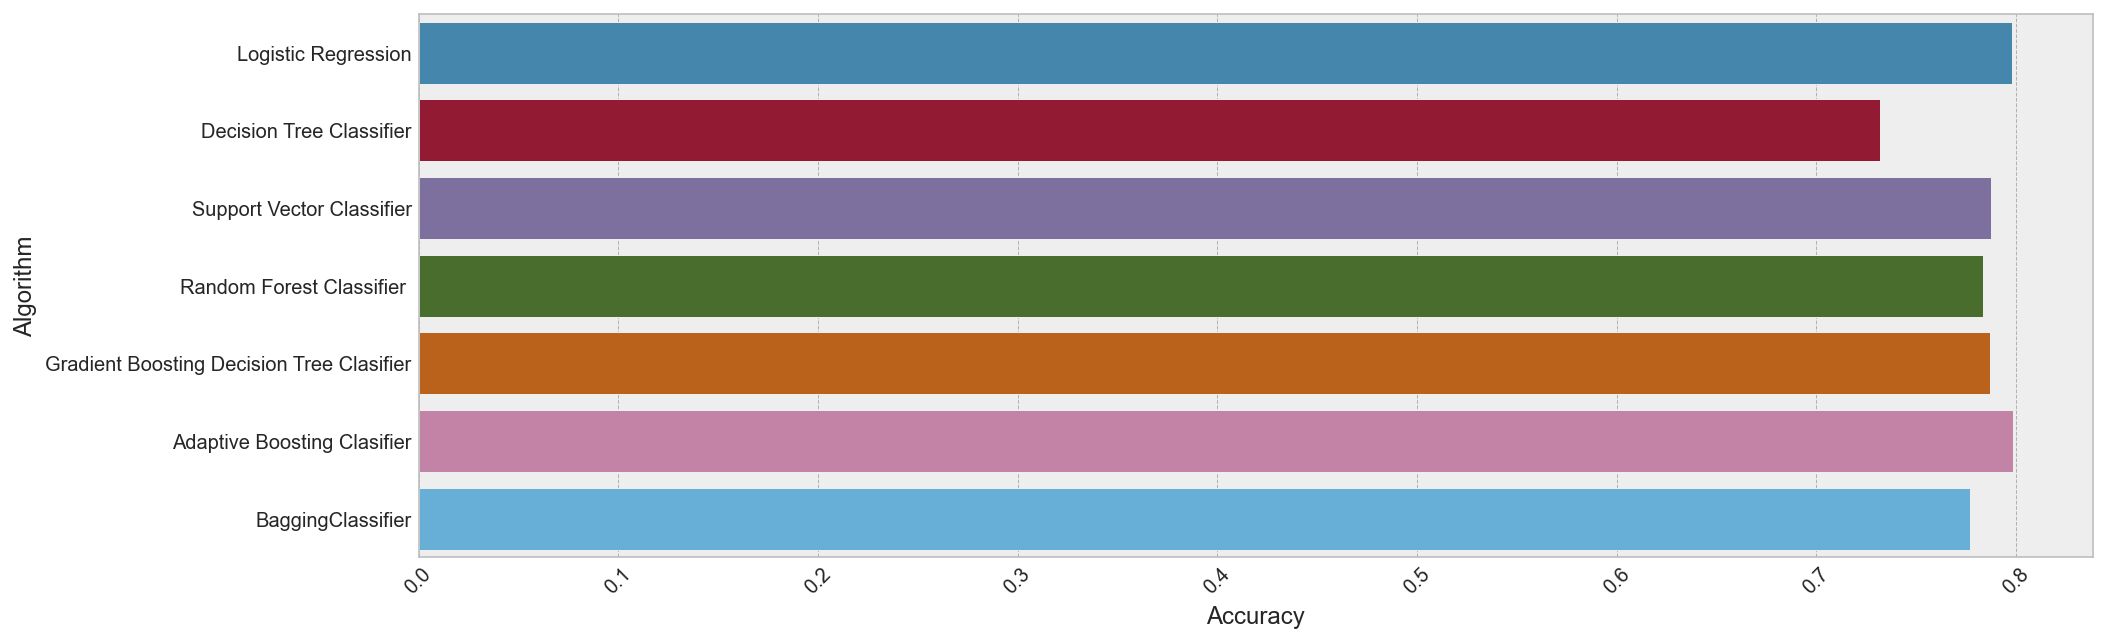

In [90]:
plt.figure(figsize=(15,5))
plt.xticks(rotation = 45)
sns.barplot(x = data.Accuracy, y = data.Algorithm, ci = False)

## Conclusion
* From The Above Graph `Ada Boost Classifier` is more accurate with 79.8% and second is `Logistic Regression` with 79.7% and third is `Gradient Boosting Decision Tree Clasifier` is with 78.7%
* So Finally `Ada Boost Classifier` is the best algorithm 